# Support Vector Machines

SVM is a powerful classification method that is considered to be an extension of the Perceptron.

Using the Perceptron algorithm, we minimize misclassification errors. However, in SVMs our optimization objective is to maximize the margin (that is, the distance) between the separating hyperplane (decision boundary) and the training examples that are closest to this hyperplane. These training examples are the so-called support vectors.


## A custom dataset

In this notebook we will experiment with a small custom dataset that resides in an external CSV file (namely, `svm.csv`).  In brief, the content of a CSV file is formatted as plain text and can be opened with a standard text editor. Each line represents a sample. The columns are delimited by special symbols, such as commas, colons, or semicolons.

The following excerpt of a CSV file illustrates two comma-separated lines with three columns:

```
1,1,0
2,3,1
```

We will present more details about CSV files in a future lecture.

This specific dataset includes 5 samples and 3 columns. The first two columns will be considered as the input variables, whereas the third column will represent the target variables. The target variables will be in 0/1 binary format so that `svm.csv` can be used as a benchmark dataset for binary classifiers such as the Support Vector Machines.

**Notice**: The dataset file `svm.csv` must reside into the same directory as the current notebook. Otherwise, Python will not be able to access it. 


In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

data = genfromtxt('svm.csv', delimiter=',')

X = np.array(data[:, 0:2])
Y = np.array(data[:, 2], dtype=int)


Now let us examine the input variables (or, the features) of the dataset.


In [3]:
print("Input Variables:", X.shape)
print(X)


Input Variables: (5, 2)
[[0. 0.]
 [1. 1.]
 [2. 3.]
 [2. 0.]
 [3. 4.]]


Below we print the the target variables of the 5 samples of the dataset. This is a classification problem. In such types of problems, we usually refer to the target variables as class labels. 


In [4]:
print("Target Variables:", Y.shape)
print(Y)


Target Variables: (5,)
[0 0 1 0 1]


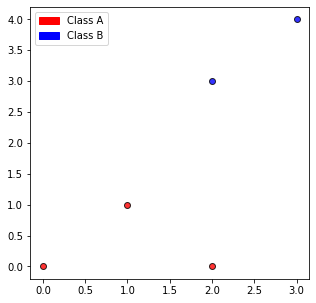

In [5]:
fig = plt.figure(figsize=(5, 5))

colors = { 0 : 'red' , 1 : 'blue' }
ecolors = [ colors[y] for y in Y ]
red = mpatches.Patch(color='red', label='Class A')
blue = mpatches.Patch(color='blue', label='Class B')

# Plot the points of class 0
plt.scatter(x=X[Y==0, 0], y=X[Y==0, 1], alpha=0.8, c=colors[0], marker='o', label='label1', edgecolor='black')

# Plot the points of class 1
plt.scatter(x=X[Y==1, 0], y=X[Y==1, 1], alpha=0.8, c=colors[1], marker='o', label='label2', edgecolor='black')

plt.legend(handles=[red, blue], loc=0)
plt.show()


## Support Vector Machines and scikit-learn

Regarding [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html), scikit-learn includes three implementations: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html) are similar methods, but they accept slightly different sets of parameters. On the other hand, [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) is another (faster) implementation of Support Vector Classification for the case of a linear kernel. Note that `LinearSVC` does not accept the `kernel` parameter, as this is assumed to be linear.

In this notebook we will use [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), because it can accept different types of kernels; therefore, it is suitable for handling both linear, and non-linear data distributions. Its most important properties are:

* `kernel{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'`: Specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. If none is given, 'rbf' will be used. 
* `max_iter`: Hard limit on iterations within solver, or -1 for no limit.
* `decision_function_shape{'ovo', 'ovr'}, default='ovr'`: Whether to return a one-vs-rest ('ovr') decision function as all other classifiers, or the original one-vs-one decision function of libsvm.


In [6]:
from sklearn.svm import SVC

Classifier = SVC(kernel = 'linear', C = 1.0, random_state = 1) # Create an SVM model with linear kernel
Classifier.fit(X, Y)


SVC(kernel='linear', random_state=1)

In [7]:
# Plot 2 dimensional spaces and decision boundaries
def plot_decision_regions_2D(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'o', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
 
    # x1_min, x1_max = -1, 6
    # x2_min, x2_max = -1, 6

    # meshgrid: Return coordinate matrices from coordinate vectors. More specifically, we make N-D coordinate arrays
    # for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays.
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # ravel: Return a contiguous flattened array.
    # T: the transpose matrix
    X_test = np.array([xx1.ravel(), xx2.ravel()]).T
    # print(X_test)

    Z = classifier.predict(X_test)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


## Model interpretation

In the following interpretation, we use the following notation:
* $C$ represents the number of classes,
* $n$ is the number of features, and
* $S$ to denote the number of the computed Support Vectors.

Now the scikit-learn 
* `coef_`: An array that stores the weights assigned to the features. It is filled only when `kernel="linear"`. Its shape is $C(C-1)/2 \times n$.
* `intercept_`: An array that stores the constants in the decision function. Its shape is $C(C-1)/2 \times 1$.
* `support_`: An array that stores the indices of the computed Support Vectors. Its shape is $S \times 1$.
* `support_vectors_`: An array that stores the computed Support Vectors. Its dimensions are $S \times n$.
* `n_support_`: An array that stores the number of the Support Vectors for each class. Its dimensions are $1 \times C$.


In [8]:
%%javascript
// A small piece of Javascript code that automatically assigns numbers to the equations
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});


<IPython.core.display.Javascript object>

In [9]:
print("Vector of weights (w):", Classifier.coef_[0])
print("b:", Classifier.intercept_[0])
print("Indices of support vectors:", Classifier.support_)
print("Support vectors:\n", Classifier.support_vectors_)
print("\nNumber of support vectors for each class:", Classifier.n_support_)


Vector of weights (w): [0.4 0.8]
b: -2.2
Indices of support vectors: [1 2]
Support vectors:
 [[1. 1.]
 [2. 3.]]

Number of support vectors for each class: [1 1]


## Plotting the decision boundary and the margin lines

Since we employed a linear kernel for our SVM classifier, the decision boundary is a straingt line. The line equation of the decision boundary is:

\begin{equation}
b + \mathbf{x}^T\mathbf{w} = 0
\label{eq:main}
\end{equation}

where $b$ is given by the model's `intercept_` attribute, and $\mathbf{w}$ is the aforementioned vector of weights that is given by the model's `coef_` attribute. Consequently, in our 2-dimensional example Eq. \eqref{eq:main} can be written as follows:

\begin{equation}
b + \mathbf{x}^T\mathbf{w} = 0 \implies b + \begin{bmatrix} x_0 \\ x_1 \end{bmatrix} \begin{bmatrix} w_0 ~~~ w_1 \end{bmatrix} = 0 \implies b + w_0x_0 + w_1x_1 = 0 \implies x_1 = -\frac{w_0}{w_1}x_0 - \frac{b}{w_1}
\label{eq:2d}
\end{equation}

In Eq. \eqref{eq:2d} we call the ratio $-w_0/w_1$ as the slope $w$ of the line, namely:

\begin{equation}
w = -\frac{w_0}{w_1}
\label{eq:slope}
\end{equation}

and by plugging Eq. \eqref{eq:slope} into Eq. \eqref{eq:2d} we get the final form of the equation of the decision boundary:

\begin{equation}
x_1 = w \cdot x_0 - \frac{b}{w_1}
\label{eq:hyperplane}
\end{equation}

According to the previous data, we have two support vectors. The first one is $\mathbf{x}_1=(1,1)$ and supports the class 0 (we also call it the class A). Notice that $\mathbf{x}_1=(1,1)$ is a real sample (i.e. feature vector) of the input dataset. The second support vector is $\mathbf{x}_2=(2,3)$ and it is also a real sample of the dataset. It supports the class 1 which can be considered as the class B.

Regarding the margin lines, the first element that we can consider is that they are both parallel to the decision boundary. In other words, the slopes of both lines are equal to the slope $w=-w_0/w_1$ of the decision boundary (Eq. \eqref{eq:slope}). So the first margin line passes through the first support vector $\mathbf{x}_1=(1,1)$ and has the same slope $w=-w_0/w_1$ as the decision boundary. Its equation is:

\begin{equation}
y = w \cdot x + \mathbf{x}_1^{(1)} - w \cdot \mathbf{x}_1^{(0)}
\label{eq:margin1}
\end{equation}

Similarly, the second line of the margin passes through the second support vector $\mathbf{x}_2=(2,3)$ and also has the same slope $w=-w_0/w_1$ as the decision boundary. Its equation is:

\begin{equation}
y = w \cdot x + \mathbf{x}_2^{(1)} - w \cdot \mathbf{x}_2^{(0)}
\label{eq:margin2}
\end{equation}



Support Vector 1: [1. 1.]
Line 1: -0.5 * x +  1.5
Support Vector 2: [2. 3.]
Line 2: -0.5 * x + 4.0


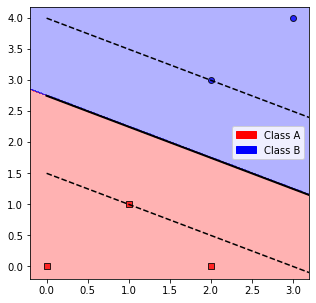

In [10]:
# The b parameter
b = Classifier.intercept_[0]

# w: the vector of weights
w = Classifier.coef_[0]

# The slope of the hyperplane
slope = -w[0] / w[1]

# The coordinates for the hyperplane (decision boundary)
xx = np.linspace(0, 4, 50)     # Create 50 points between 0 and 4
yy = slope * xx - (b / w[1])   # The equation of the decision boundary (Eq. 4)

# The equation of the first margin line (Eq. 5)
s = Classifier.support_vectors_[0]
yy_down = slope * xx + (s[1] - slope * s[0])
print ("Support Vector 1:", s)
print("Line 1:", slope, "* x + ", s[1] - slope * s[0])

# The equation of the second margin line (Eq. 6)
s = Classifier.support_vectors_[-1]
yy_up = slope * xx + (s[1] - slope * s[0])
print ("Support Vector 2:", s)
print("Line 2:", slope, "* x +", s[1] - slope * s[0])

# Plot the two-dimensional input space
fig = plt.figure(figsize=(5, 5))
plot_decision_regions_2D(X, Y, Classifier)

# Plot the hyperplane (decision boundary)
plt.plot(xx, yy, linewidth=2, color='black');

# Plot the 2 margin lines (use k-- for dashed style)
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.legend(handles=[red, blue], loc=0)
plt.show()


## Classifying unknown samples

Now let us use our trained SVM model to classify some unknown 2-d samples:

In [11]:
print(Classifier.predict([[3,3]])[0])  # 'B'
print(Classifier.predict([[4,0]])[0])  # 'A'
print(Classifier.predict([[2,2]])[0])  # 'B'
print(Classifier.predict([[1,2]])[0])  # 'A'

1
0
1
0
